In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torch 


from transformers import AutoTokenizer
from transformers import GPT2LMHeadModel

from sklearn.preprocessing import StandardScaler

In [13]:
ws = ' technician, accountant, supervisor, engineer, worker, educator, clerk, counselor, inspector, mechanic, manager, therapist, administrator, salesperson, receptionist, librarian, advisor, pharmacist, janitor, psychologist, physician, carpenter, nurse, investigator, bartender, specialist, electrician, officer, pathologist, teacher, lawyer, planner, practitioner, plumber, instructor, surgeon, veterinarian, paramedic, examiner, chemist, machinist, appraiser, nutritionist, architect, hairdresser, baker, programmer, paralegal, hygienist, scientist, female, woman, girl, sister, she, her, hers, daughter, male, man, boy, brother, he, him, his, son'
ws = ws.strip().split(', ')
ws = [' ' + w for w in ws]
len(ws), ws[:5]

(66, [' technician', ' accountant', ' supervisor', ' engineer', ' worker'])

In [14]:
# ws[:50]
ws[50:58], ws[59:]

([' female',
  ' woman',
  ' girl',
  ' sister',
  ' she',
  ' her',
  ' hers',
  ' daughter'],
 [' man', ' boy', ' brother', ' he', ' him', ' his', ' son'])

In [15]:
model = GPT2LMHeadModel.from_pretrained('model_unique_rev_best/')
tok = AutoTokenizer.from_pretrained('gpt2')
tok.add_special_tokens({'pad_token': '<|endoftext|>'})

0

In [16]:
def get_word_vec(text):
    model_inp = tok(text, return_tensors='pt')
    outputs = model(**model_inp, output_hidden_states=True)
    hidden_states = outputs.hidden_states
    final_rep = hidden_states[-1]  # (1, N tokens, 768)
    final_rep = final_rep.mean(axis=1) # this makes it work also for special cases 
    final_rep = final_rep.squeeze()
    return final_rep

In [17]:
get_word_vec(ws[0]).shape

torch.Size([768])

In [18]:
dat = torch.zeros((len(ws), 768))
dat    

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [19]:
for ix, w in enumerate(ws):
    vec = get_word_vec(w)
    dat[ix, :] = vec
    
dat = dat.detach().numpy()
dat

array([[ 0.24856812, -1.0440538 , -0.38530695, ...,  0.03990982,
        -0.10753424,  0.00730459],
       [ 0.24470082, -1.0627973 , -0.32391465, ...,  0.02515118,
        -0.11964516,  0.01268686],
       [ 0.28352463, -0.9936409 , -0.33112872, ...,  0.02041074,
        -0.08235381,  0.01357216],
       ...,
       [ 0.16942759, -1.0756208 , -0.3418127 , ...,  0.03772319,
        -0.12411934, -0.00527881],
       [ 0.17104769, -1.0647882 , -0.38084367, ...,  0.02220581,
        -0.11339206, -0.03194879],
       [ 0.2556951 , -1.0188776 , -0.28324574, ...,  0.05187357,
        -0.12833916, -0.04818548]], dtype=float32)

In [20]:
dat.shape

(66, 768)

In [21]:
scaler = StandardScaler() #this scales the columns
scaled_dat = scaler.fit_transform(dat)
scaled_dat

array([[ 0.15342568, -0.54872143,  0.28647512, ..., -0.05758736,
        -0.19219445,  0.10803889],
       [ 0.11968773, -0.6133966 ,  0.5322287 , ..., -0.28732455,
        -0.34637487,  0.14668944],
       [ 0.4583831 , -0.37476996,  0.50335073, ..., -0.36111563,
         0.12837   ,  0.1530469 ],
       ...,
       [-0.53698903, -0.6576444 ,  0.4605827 , ..., -0.09162512,
        -0.40333423,  0.0176763 ],
       [-0.52285546, -0.6202663 ,  0.30434167, ..., -0.33317298,
        -0.26676846, -0.17384331],
       [ 0.21560086, -0.46185017,  0.6950264 , ...,  0.12864365,
        -0.45705542, -0.29044047]], dtype=float32)

In [22]:
u, s, vh = np.linalg.svd(scaled_dat, full_matrices=False)

In [23]:
u.shape # each row represents each word

(66, 66)

In [24]:
s.shape, s  # singular values 

((66,),
 array([1.5166562e+02, 6.7020981e+01, 5.9918186e+01, 5.5957623e+01,
        5.4365677e+01, 4.7179371e+01, 4.4650730e+01, 4.0084526e+01,
        3.5854889e+01, 3.5281452e+01, 2.8531898e+01, 2.8244211e+01,
        2.3241951e+01, 2.1388004e+01, 1.9079592e+01, 1.7891777e+01,
        1.5495920e+01, 1.5252658e+01, 1.3422255e+01, 1.0359640e+01,
        9.7154894e+00, 9.0867138e+00, 8.7375326e+00, 8.2000027e+00,
        7.9943213e+00, 7.4346251e+00, 7.2347746e+00, 6.8587890e+00,
        6.2028732e+00, 6.0851569e+00, 5.9021173e+00, 5.6004181e+00,
        5.5461202e+00, 5.3754878e+00, 5.1483464e+00, 4.9374685e+00,
        4.8573346e+00, 4.6973786e+00, 4.5872383e+00, 4.4211125e+00,
        4.3521490e+00, 4.1626630e+00, 4.0858936e+00, 3.9036441e+00,
        3.7793009e+00, 3.6867499e+00, 3.6011932e+00, 3.5257838e+00,
        3.3527265e+00, 3.2879279e+00, 3.2173471e+00, 3.1983557e+00,
        3.1043174e+00, 2.8944790e+00, 2.7493868e+00, 2.6387064e+00,
        2.4001439e+00, 2.2275383e+00, 2.

In [25]:
vh.shape  # 

(66, 768)

In [26]:
mode_id = 10

u_vec = u[:, mode_id]
v_vec = vh[mode_id, :]

mode_mat = np.outer(u_vec, v_vec)
mode_mat.shape

(66, 768)

In [27]:
word_scores = []
for word_idx, w in enumerate(ws):
    w_vec = mode_mat[word_idx, :]
    score = np.abs(w_vec).sum()
    word_scores.append((word_idx, w, score))
    
word_scores.sort(key=lambda vs: vs[2], reverse=True) 
word_scores

[(15, ' librarian', 13.335296),
 (13, ' salesperson', 10.066734),
 (26, ' electrician', 9.49658),
 (14, ' receptionist', 4.5199823),
 (41, ' appraiser', 3.0863297),
 (21, ' carpenter', 2.6371737),
 (42, ' nutritionist', 2.0550418),
 (47, ' paralegal', 2.0339851),
 (17, ' pharmacist', 1.9896581),
 (28, ' pathologist', 1.9832554),
 (48, ' hygienist', 1.9490204),
 (44, ' hairdresser', 1.2222235),
 (54, ' she', 0.8576214),
 (62, ' he', 0.854007),
 (63, ' him', 0.575138),
 (37, ' paramedic', 0.5459272),
 (30, ' lawyer', 0.48917103),
 (24, ' bartender', 0.45148042),
 (50, ' female', 0.4112619),
 (57, ' daughter', 0.40922213),
 (33, ' plumber', 0.40676686),
 (55, ' her', 0.40589818),
 (65, ' son', 0.3892119),
 (6, ' clerk', 0.38859618),
 (18, ' janitor', 0.383187),
 (10, ' manager', 0.3498782),
 (64, ' his', 0.3442464),
 (40, ' machinist', 0.33754694),
 (52, ' girl', 0.33626652),
 (36, ' veterinarian', 0.31763035),
 (58, ' male', 0.30519733),
 (8, ' inspector', 0.29026353),
 (12, ' administra

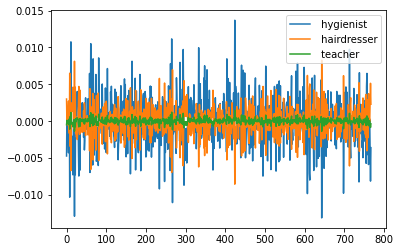

In [28]:
# for word_idx, w in enumerate(ws):
word_idx = 48
w_vec = mode_mat[word_idx, :]
plt.plot(list(range(w_vec.shape[0])), w_vec, label=ws[word_idx])

word_idx = 44
w_vec = mode_mat[word_idx, :]
plt.plot(list(range(w_vec.shape[0])), w_vec, label=ws[word_idx])

word_idx = 29
w_vec = mode_mat[word_idx, :]
plt.plot(list(range(w_vec.shape[0])), w_vec, label=ws[word_idx])


plt.legend()
# plt.tight_layout()

plt.show()

### Quick Dimensionality Redux + Plotting

In [29]:
from sklearn.decomposition import PCA

In [30]:
scaled_dat.shape

(66, 768)

In [31]:
pca = PCA(n_components = 2)

red_dat = pca.fit_transform(scaled_dat)
red_dat.shape

(66, 2)

In [ ]:
for i, name in enumerate(ws):
    plt.annotate(name, (x_transform[i,0], x_transform[i,1]))

(-1.5, 1.5)

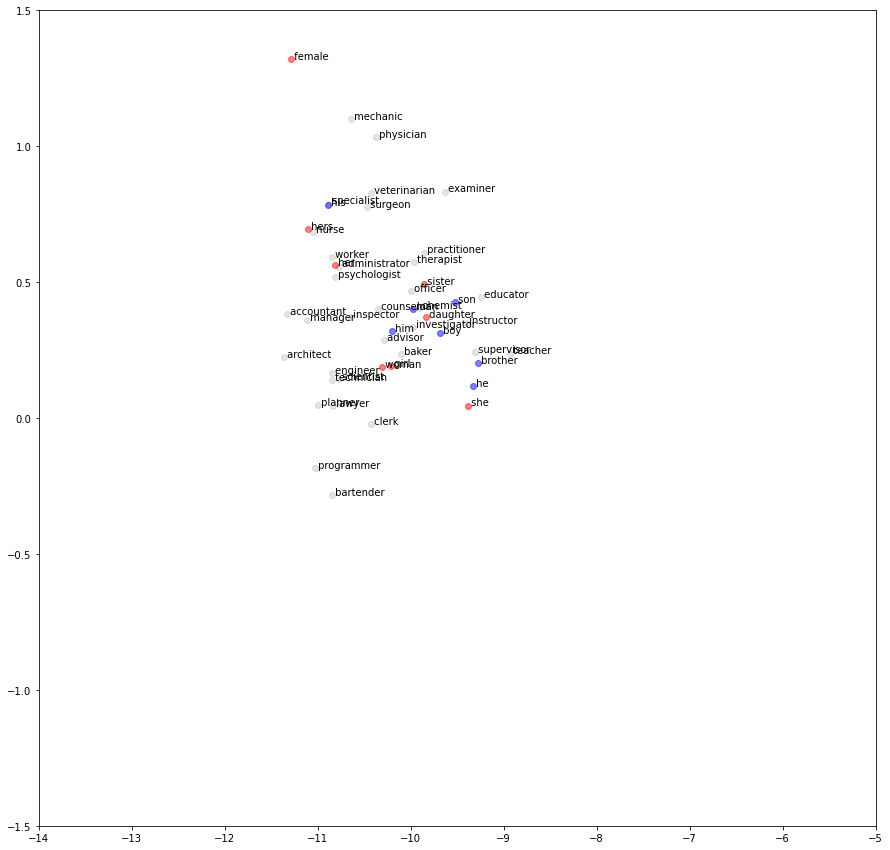

In [54]:
#plt.scatter(red_dat[:50, 0], red_dat[:50, 1], c='k') #first 50 are career words
plt.figure(figsize=(15, 15))
plt.scatter(red_dat[50:58, 0], red_dat[50:58, 1], c='r', alpha = 0.5) # female words
plt.scatter(red_dat[59:, 0], red_dat[59:, 1], c='b', alpha = 0.5) # male words
plt.scatter(red_dat[:50, 0], red_dat[:50, 1], c='k', alpha = 0.1) #first 50 are career words

for i, name in enumerate(ws):
    plt.annotate(name, (red_dat[i,0], red_dat[i,1]))

plt.xlim(-14, -5)
plt.ylim(-1.5, 1.5)

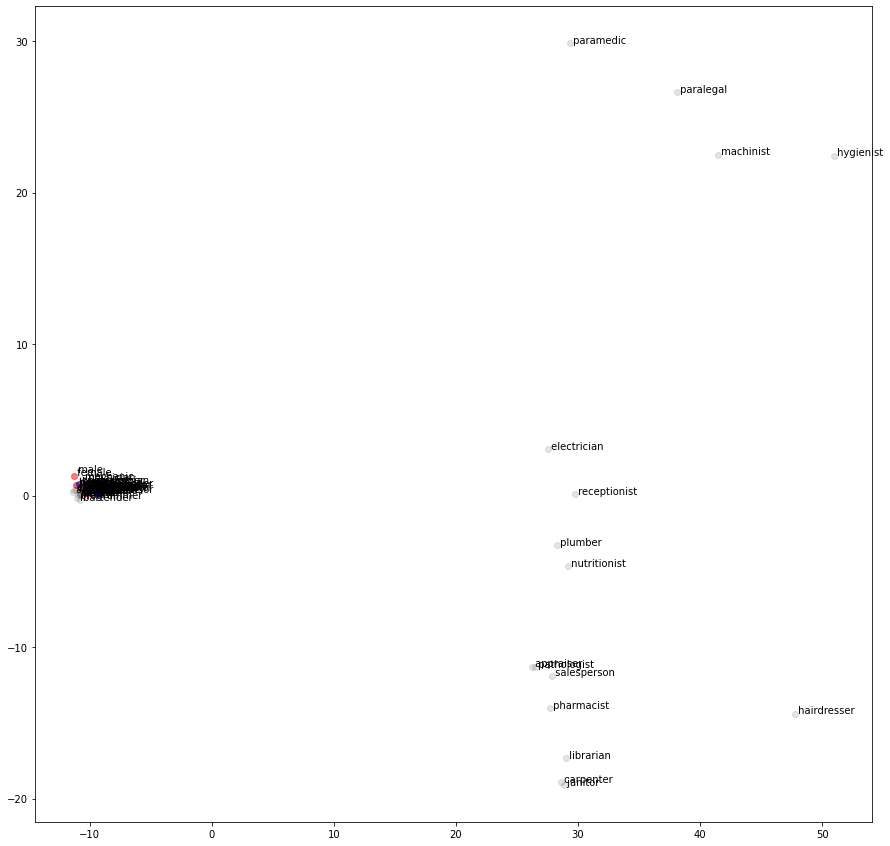

In [56]:
#plt.scatter(red_dat[:50, 0], red_dat[:50, 1], c='k') #first 50 are career words
plt.figure(figsize=(15, 15))
plt.scatter(red_dat[50:58, 0], red_dat[50:58, 1], c='r', alpha = 0.5) # female words
plt.scatter(red_dat[59:, 0], red_dat[59:, 1], c='b', alpha = 0.5) # male words
plt.scatter(red_dat[:50, 0], red_dat[:50, 1], c='k', alpha = 0.1) #first 50 are career words

for i, name in enumerate(ws):
    plt.annotate(name, (red_dat[i,0], red_dat[i,1]))

# plt.xlim(-14, -5)
# plt.ylim(-1.5, 1.5)